In [99]:
!pip install pandas numpy matplotlib seaborn


In [100]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Superstore Sales.csv", encoding="latin1")

# Display the first 5 rows
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [101]:
# Check basic info (columns, data types, missing values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [102]:
# Summary statistics for numerical columns
df.describe()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [103]:
# Count missing values in each column
df.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [104]:
# Count duplicate rows
df.duplicated().sum()


0

In [105]:
df.dtypes


Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [106]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df["Postal Code"] = df["Postal Code"].astype(str)

In [107]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)


Categorical Columns: Index(['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name'],
      dtype='object')


In [108]:
# List unique values in each relevant categorical column
relevant_cats = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 
                 'Category', 'Sub-Category', 'Product Name']

for col in relevant_cats:
    print(f"Unique values in '{col}':")
    print(df[col].unique(), "\n")


Unique values in 'Ship Mode':
['Second Class' 'Standard Class' 'First Class' 'Same Day'] 

Unique values in 'Segment':
['Consumer' 'Corporate' 'Home Office'] 

Unique values in 'Country':
['United States'] 

Unique values in 'City':
['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detr

In [109]:
for col in relevant_cats:
    df[col] = df[col].str.strip().str.title()


In [110]:
for col in relevant_cats:
    print(f"Cleaned values in '{col}':")
    print(df[col].unique(), "\n")


Cleaned values in 'Ship Mode':
['Second Class' 'Standard Class' 'First Class' 'Same Day'] 

Cleaned values in 'Segment':
['Consumer' 'Corporate' 'Home Office'] 

Cleaned values in 'Country':
['United States'] 

Cleaned values in 'City':
['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' '

In [111]:
df.to_csv("Superstore_Cleaned.csv", index=False)


In [112]:
df.describe()


,Row ID,Order Date,Ship Date,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,623.245101,2.225110,0.206452,234.260108


In [113]:
df.nunique()


Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

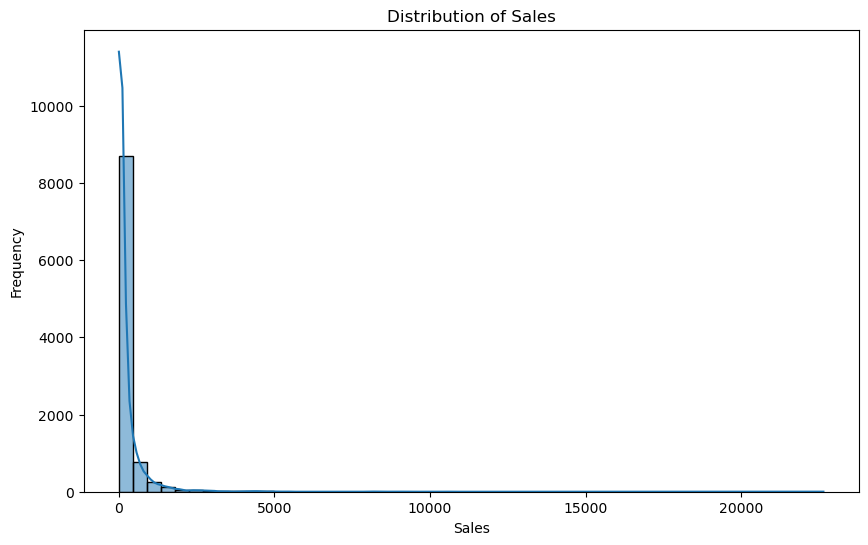

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


## Sales Distribution & Outliers

### Finding

- The majority of sales values are relatively low, but a few transactions contribute significantly high revenue.
- The sales distribution is **right-skewed**, meaning most transactions involve smaller amounts.

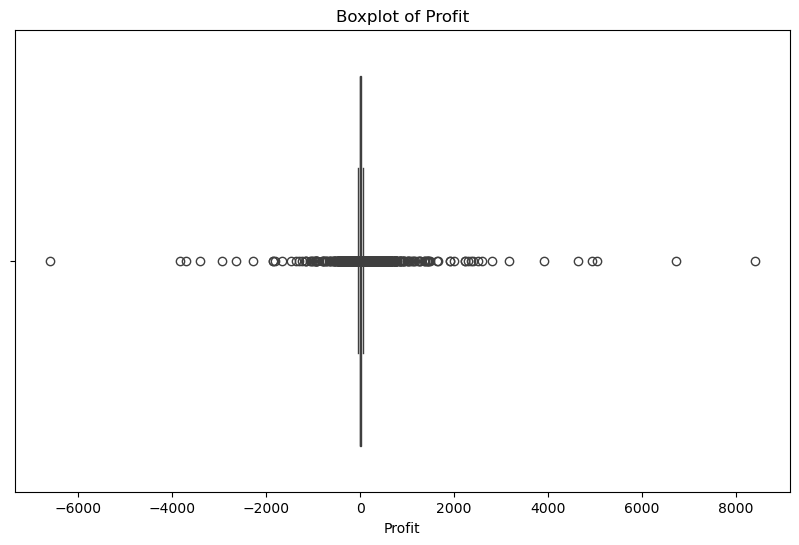

In [116]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Profit'])
plt.title('Boxplot of Profit')
plt.show()


## Profitability Analysis

### Finding

- The **boxplot** of profit reveals ***negative profit outliers***, indicating loss-making transactions.
- Some high-sales transactions are unprofitable, meaning high revenue doesn’t always mean high profit.

/var/folders/mf/pjg0mk757xj_7wrzg8xb_7tr0000gn/T/ipykernel_3194/307858191.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Sales', data=df, estimator=sum, ci=None)


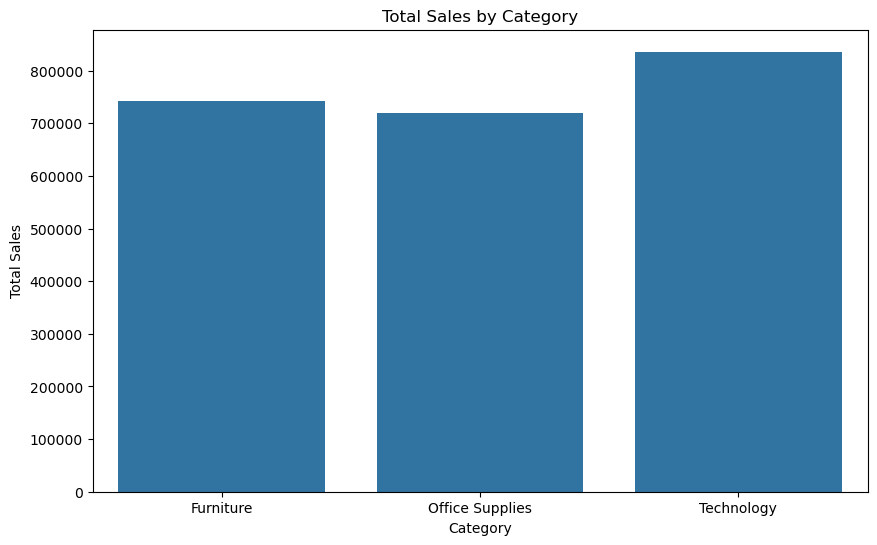

In [118]:
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Sales', data=df, estimator=sum, ci=None)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()


## Sales by Product Category

### Finding

- The Technology category generates the highest total sales, followed by Furniture and Office Supplies.
- Office Supplies category has the lowest total sales.

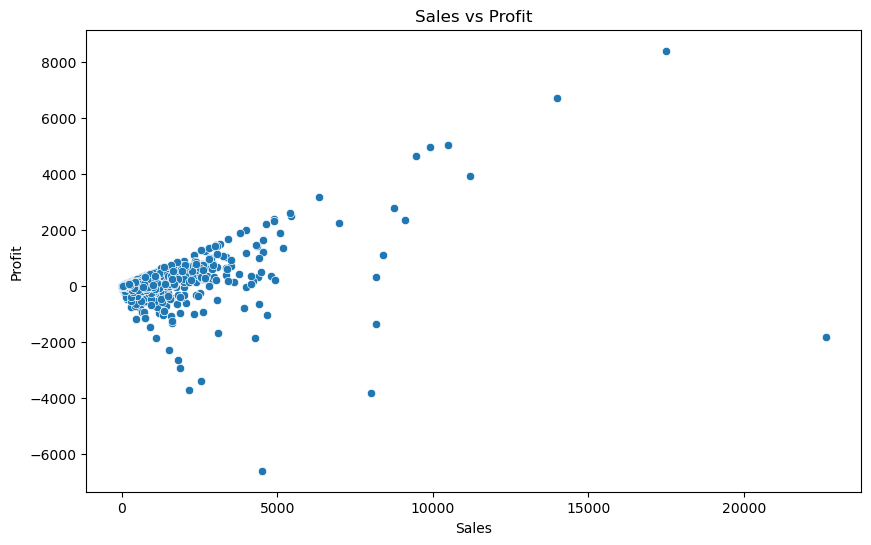

In [120]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


## Sales vs. Profit Relationship

### Finding

- The **scatter plot** between Sales and Profit shows a ***weak correlation***.
- Some high-revenue transactions result in low or negative profits.

/var/folders/mf/pjg0mk757xj_7wrzg8xb_7tr0000gn/T/ipykernel_3194/4118717383.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Sales', data=df, estimator=sum, ci=None)


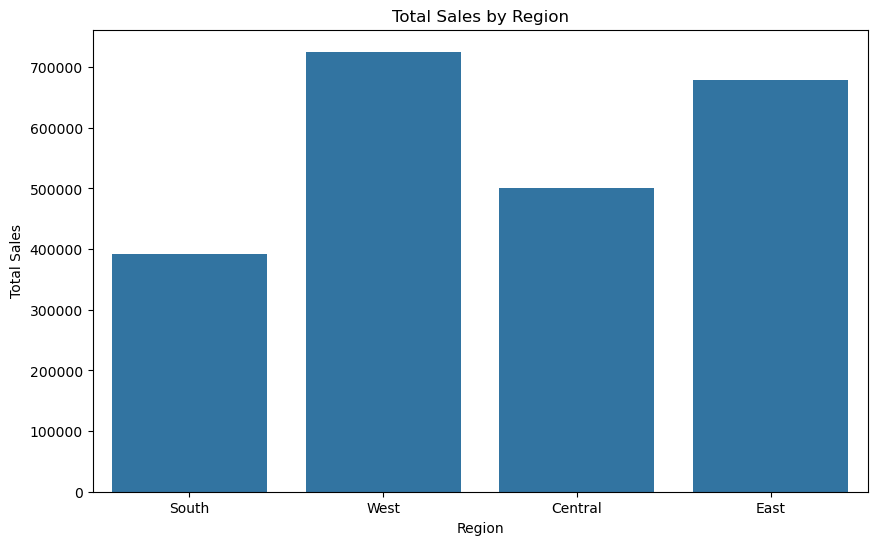

In [122]:
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Sales', data=df, estimator=sum, ci=None)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()


## Regional Sales Performance

### Finding

- The Western region has the highest total sales, while the Southern region has the lowest sales.

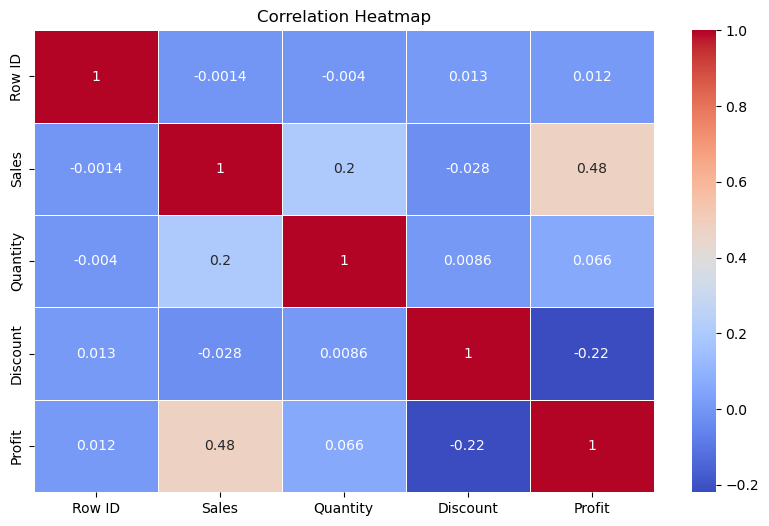

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


## Impact of Discount on Profit

### Finding

- The **correlation heatmap** shows a negative relationship between Discount and Profit.
- Higher discounts often lead to lower profitability, even though they might drive sales.


# Exploratory Data Analysis (EDA) on Superstore Sales Data

## 1. Introduction

### Project Title
Exploratory Data Analysis (EDA) on Superstore Sales Data

### Objective
The goal of this analysis is to explore sales and profitability trends, identify key patterns, and extract actionable insights to improve business performance.

### Dataset Overview
- The dataset contains **9,994** sales transaction records.
- It includes **21 columns**, such as Order Date, Product Category, Sales, Profit, Discount, and Region.
- The data covers multiple product categories, regions, and customer segments.

### Tools & Techniques Used
- **Python** (*Pandas, NumPy, Matplotlib, Seaborn*)
- **Jupyter Notebook** for ***data analysis*** and ***visualization***
- **Descriptive Statistics, Correlation Analysis, Data Visualizations**

## 2. Data Cleaning & Preparation

- No missing values were found in the dataset.
- Duplicate records were checked and removed.
- Data types were corrected:
    - Order Date and Ship Date converted to **datetime format**.
    - Postal Code converted to **string format**.
- Categorical values were ***standardized*** (removed extra spaces, fixed inconsistent capitalization).
  
## 3. Key Insights from the Analysis

## 3.1 Sales Distribution & Outliers

### Finding

- The majority of sales values are relatively low, but a few transactions contribute significantly high revenue.
- The sales distribution is **right-skewed**, meaning most transactions involve smaller amounts.

### Business Implication

- The company should focus on high-value customers and products contributing to the highest sales.
- Discount strategies or premium offerings could be optimized to increase profitability from smaller transactions.
  
## 3.2 Profitability Analysis

### Finding

- The **boxplot** of profit reveals ***negative profit outliers***, indicating loss-making transactions.
- Some high-sales transactions are unprofitable, meaning high revenue doesn’t always mean high profit.

### Business Implication

- Loss-making products need to be analyzed—with questions like are discounts too high? Are there high operational costs?
- The company should reassess its pricing strategy and optimize discounting policies to minimize losses.

## 3.3 Sales by Product Category

### Finding

- The Technology category generates the highest total sales, followed by Furniture and Office Supplies.
- Office Supplies category has the lowest total sales.

### Business Implication

- The company should focus on boosting Office Supplies sales through promotions, better customer targeting, or product diversification.
- Technology products are a strong revenue driver—investing in more tech products or bundling them with Office Supplies could be beneficial.

## 3.4 Sales vs. Profit Relationship

### Finding

- The **scatter plot** between Sales and Profit shows a ***weak correlation***.
- Some high-revenue transactions result in low or negative profits.

### Business Implication

- A sales-driven approach isn’t enough; profitability must also be considered.
- The company should analyze whether high discounts or high-cost products are affecting profit margins.

## 3.5 Regional Sales Performance

### Finding

- The Western region has the highest total sales, while the Southern region has the lowest sales.

### Business Implication

- The company should invest in marketing and expansion in the South to increase sales.
- Investigate why the West is outperforming—better distribution, higher demand, or better product availability?

## 3.6 Impact of Discount on Profit

### Finding

- The **correlation heatmap** shows a negative relationship between Discount and Profit.
- Higher discounts often lead to lower profitability, even though they might drive sales.

### Business Implication

- The company should reduce excessive discounts on certain products that don’t generate enough revenue.
- Targeted discount strategies (e.g., discounts for bulk purchases) may help increase profit margins.

## 4. Conclusion & Recommendations

Based on our analysis, the following recommendations can help optimize sales and profitability:

- 1. Reduce unnecessary discounts to prevent loss-making transactions.
- 2. Increase focus on high-performing categories (Technology, Furniture) and improve marketing for Office Supplies.
- 3. Analyze unprofitable transactions and adjust pricing strategies accordingly.
- 4. Expand marketing efforts in the South region to improve sales.
- 5. Monitor high-value transactions and develop premium product offerings for top-spending customers.

